In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
df = pd.read_csv("Data.csv")

In [8]:
feature1 = "PM2.5"
feature2 = "AQI_Bucket"

contingency_table = pd.crosstab(df[feature1], df[feature2])
print("\nContingency Table:\n", contingency_table)


Contingency Table:
 AQI_Bucket  Good  Moderate  Poor  Satisfactory  Severe  Very Poor
PM2.5                                                            
0.04           0         0     0             1       0          0
0.16           1         0     0             0       0          0
0.24           1         0     0             0       0          0
0.28           1         0     0             0       0          0
0.98           1         0     0             0       0          0
...          ...       ...   ...           ...     ...        ...
723.16         0         0     0             0       1          0
821.42         0         0     0             0       1          0
858.73         0         0     0             0       1          0
868.66         0         1     0             0       0          0
914.94         0         0     0             0       1          0

[11542 rows x 6 columns]


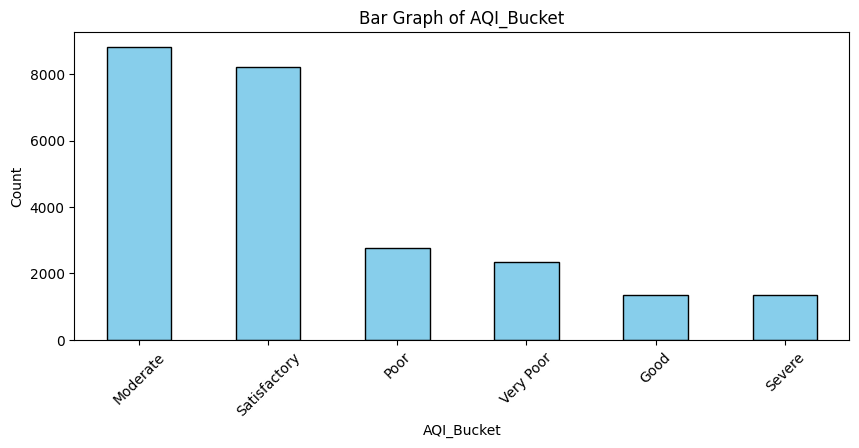

In [ ]:
# Bar Graph
plt.figure(figsize=(10, 4))
df[feature1].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel(feature1)
plt.ylabel("Count")
plt.title(f"Bar Graph of {feature1}")
plt.xticks(rotation=45)
plt.show()

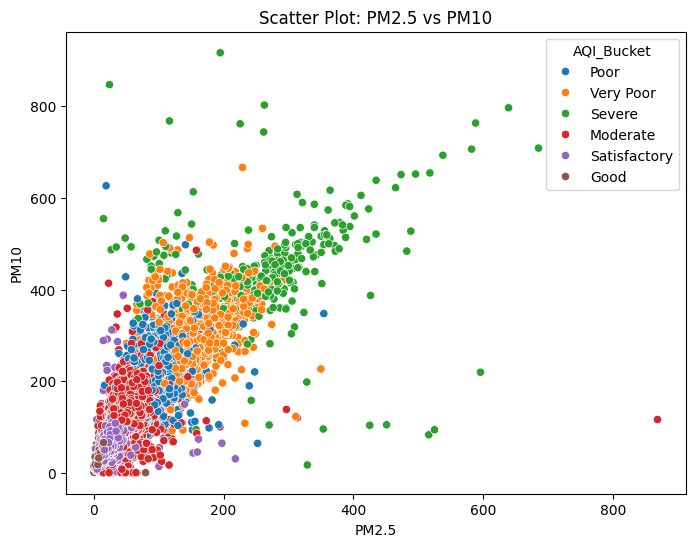

In [ ]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PM2.5"], y=df["PM10"], hue=df["AQI_Bucket"])
plt.title("Scatter Plot: PM2.5 vs PM10")
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.show()

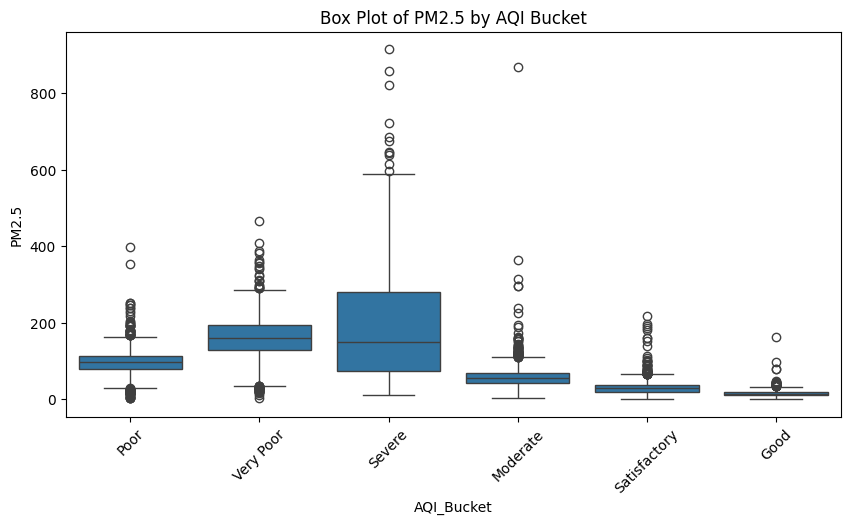

In [ ]:
# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["AQI_Bucket"], y=df["PM2.5"])
plt.title("Box Plot of PM2.5 by AQI Bucket")
plt.xticks(rotation=45)
plt.show()


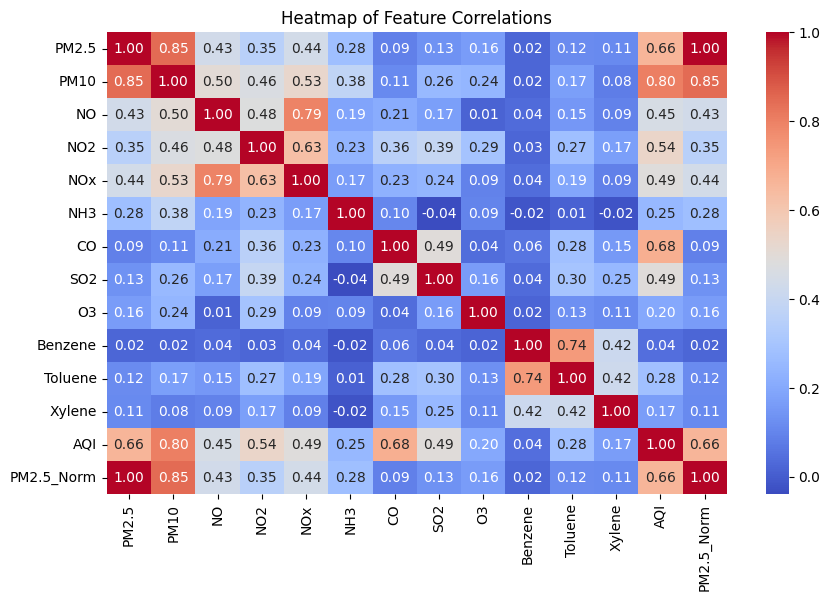

In [ ]:
# Heatmap
plt.figure(figsize=(10, 6))

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Heatmap of Feature Correlations")
plt.show()


In [ ]:
Q1 = df["PM2.5"].quantile(0.25)
Q3 = df["PM2.5"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = df[(df["PM2.5"] < lower_bound) | (df["PM2.5"] > upper_bound)]
print("\nOutliers in PM2.5:\n", outliers)


Outliers in PM2.5:
                 City        Date   PM2.5    PM10     NO    NO2     NOx    NH3  \
32         Ahmedabad  02-02-2015  178.33     NaN  54.56  35.31   72.80    NaN   
44         Ahmedabad  14-02-2015  177.33     NaN  37.49  47.58   77.85    NaN   
51         Ahmedabad  21-02-2015  239.96     NaN  61.95  46.25  106.92    NaN   
53         Ahmedabad  23-02-2015  238.41     NaN  77.70  55.07  131.32    NaN   
63         Ahmedabad  05-03-2015  173.01     NaN  48.44  42.27   90.73    NaN   
...              ...         ...     ...     ...    ...    ...     ...    ...   
26821        Talcher  17-02-2020  159.45  265.74   9.52   4.76   13.42   1.40   
28631  Visakhapatnam  14-01-2018  199.94  283.00  36.34  62.91   62.89  27.20   
28929  Visakhapatnam  08-11-2018  198.38  196.15  25.58  41.63   42.95  10.07   
28996  Visakhapatnam  14-01-2019  203.05  306.16  20.25  80.39   59.22  16.24   
29361  Visakhapatnam  14-01-2020  177.20  326.40  37.86  79.29   72.95  22.01   

      

In [ ]:
df_cleaned = df[(df["PM2.5"] >= lower_bound) & (df["PM2.5"] <= upper_bound)]

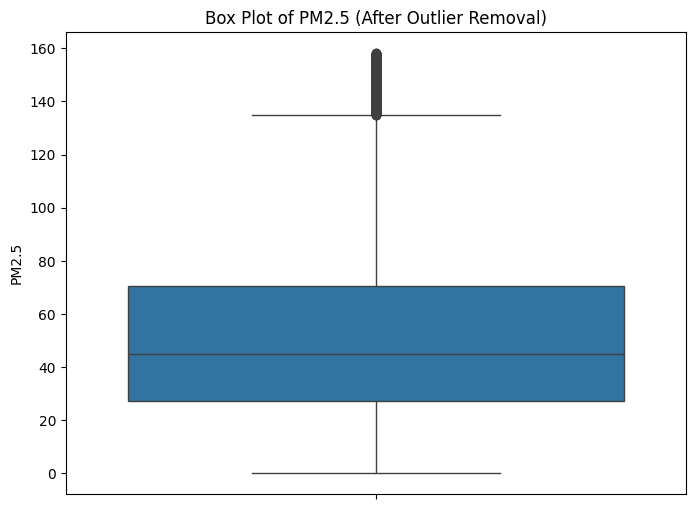

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned["PM2.5"])
plt.title("Box Plot of PM2.5 (After Outlier Removal)")
plt.show()

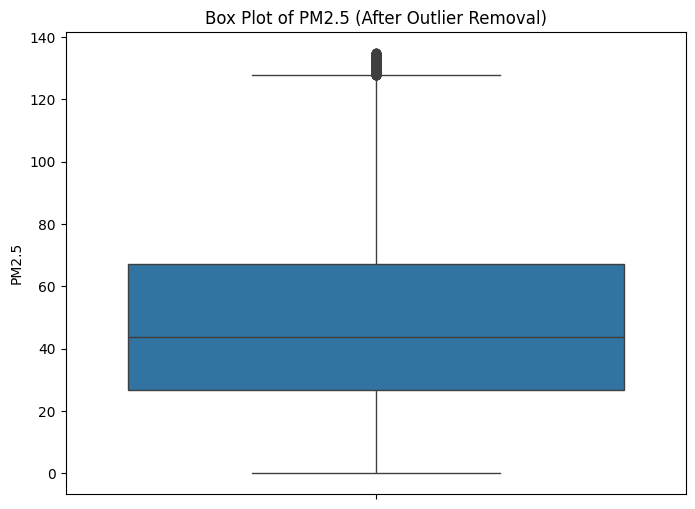

In [ ]:
Q1 = df_cleaned["PM2.5"].quantile(0.25)
Q3 = df_cleaned["PM2.5"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned[(df_cleaned["PM2.5"] < lower_bound) | (df_cleaned["PM2.5"] > upper_bound)]
#print("\nOutliers in PM2.5:\n", outliers)

df_cleaned_1 = df_cleaned[(df_cleaned["PM2.5"] >= lower_bound) & (df_cleaned["PM2.5"] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned_1["PM2.5"])
plt.title("Box Plot of PM2.5 (After Outlier Removal)")
plt.show()

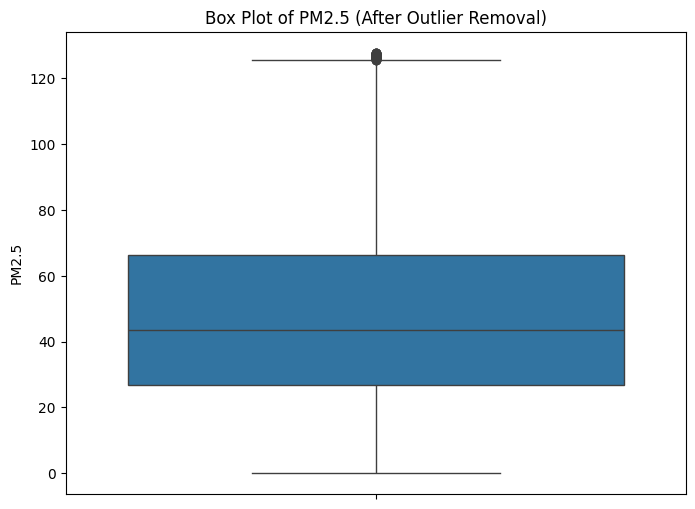

In [ ]:
Q1 = df_cleaned_1["PM2.5"].quantile(0.25)
Q3 = df_cleaned_1["PM2.5"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned_1[(df_cleaned_1["PM2.5"] < lower_bound) | (df_cleaned_1["PM2.5"] > upper_bound)]
#print("\nOutliers in PM2.5:\n", outliers)

df_cleaned_2 = df_cleaned_1[(df_cleaned_1["PM2.5"] >= lower_bound) & (df_cleaned_1["PM2.5"] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned_2["PM2.5"])
plt.title("Box Plot of PM2.5 (After Outlier Removal)")
plt.show()

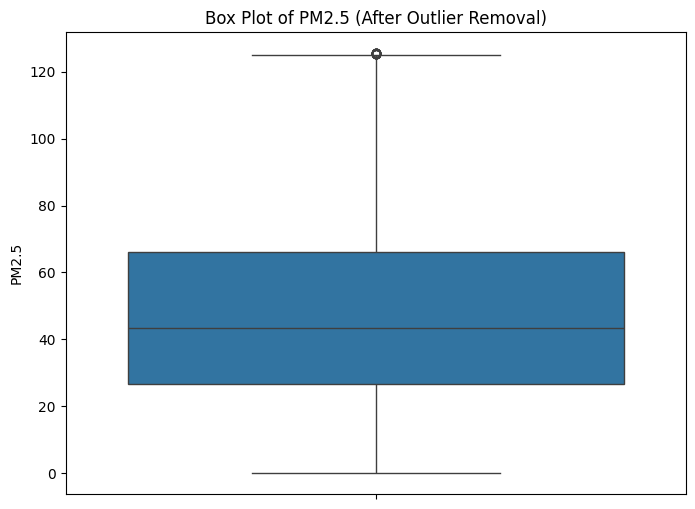

In [ ]:
Q1 = df_cleaned_2["PM2.5"].quantile(0.25)
Q3 = df_cleaned_2["PM2.5"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned_2[(df_cleaned_2["PM2.5"] < lower_bound) | (df_cleaned_2["PM2.5"] > upper_bound)]
#print("\nOutliers in PM2.5:\n", outliers)

df_cleaned_3 = df_cleaned_2[(df_cleaned_2["PM2.5"] >= lower_bound) & (df_cleaned_2["PM2.5"] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned_3["PM2.5"])
plt.title("Box Plot of PM2.5 (After Outlier Removal)")
plt.show()

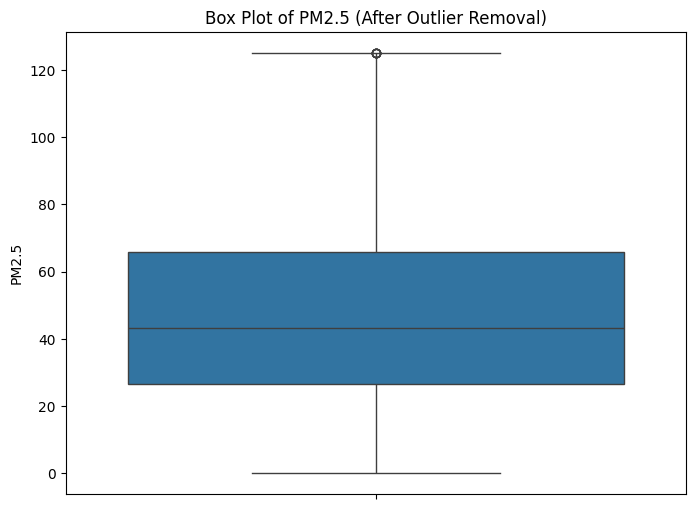

In [ ]:
Q1 = df_cleaned_3["PM2.5"].quantile(0.25)
Q3 = df_cleaned_3["PM2.5"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned_3[(df_cleaned_3["PM2.5"] < lower_bound) | (df_cleaned_3["PM2.5"] > upper_bound)]
#print("\nOutliers in PM2.5:\n", outliers)

df_cleaned_4 = df_cleaned_3[(df_cleaned_3["PM2.5"] >= lower_bound) & (df_cleaned_3["PM2.5"] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned_4["PM2.5"])
plt.title("Box Plot of PM2.5 (After Outlier Removal)")
plt.show()

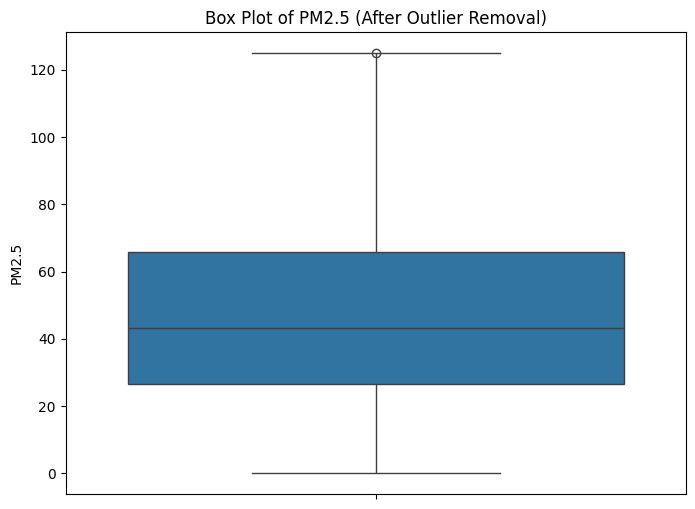

In [ ]:
Q1 = df_cleaned_4["PM2.5"].quantile(0.25)
Q3 = df_cleaned_4["PM2.5"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned_4[(df_cleaned_4["PM2.5"] < lower_bound) | (df_cleaned_4["PM2.5"] > upper_bound)]
#print("\nOutliers in PM2.5:\n", outliers)

df_cleaned_5 = df_cleaned_4[(df_cleaned_4["PM2.5"] >= lower_bound) & (df_cleaned_4["PM2.5"] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned_5["PM2.5"])
plt.title("Box Plot of PM2.5 (After Outlier Removal)")
plt.show()

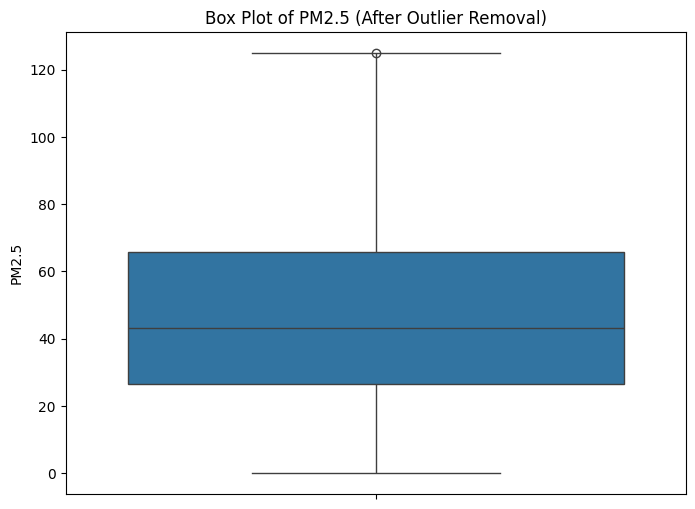

In [ ]:
Q1 = df_cleaned_5["PM2.5"].quantile(0.25)
Q3 = df_cleaned_5["PM2.5"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned_5[(df_cleaned_5["PM2.5"] < lower_bound) | (df_cleaned_5["PM2.5"] > upper_bound)]
#print("\nOutliers in PM2.5:\n", outliers)

df_cleaned_6 = df_cleaned_5[(df_cleaned_5["PM2.5"] >= lower_bound) & (df_cleaned_5["PM2.5"] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned_6["PM2.5"])
plt.title("Box Plot of PM2.5 (After Outlier Removal)")
plt.show()

In [ ]:
df_cleaned_6.to_csv("final_cleaned_data.csv")

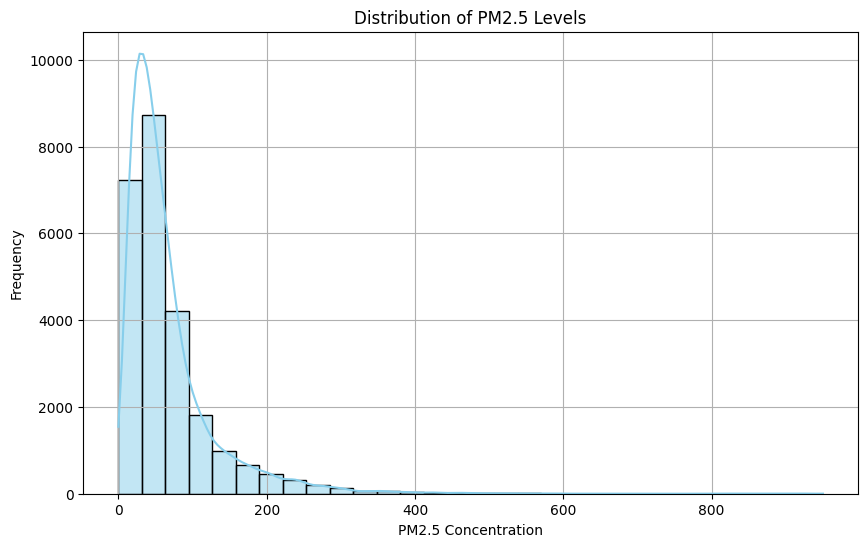

In [ ]:
# Plot histogram for PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(df["PM2.5"], bins=30, kde=True, color="skyblue")

plt.xlabel("PM2.5 Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of PM2.5 Levels")
plt.grid(True)
plt.show()


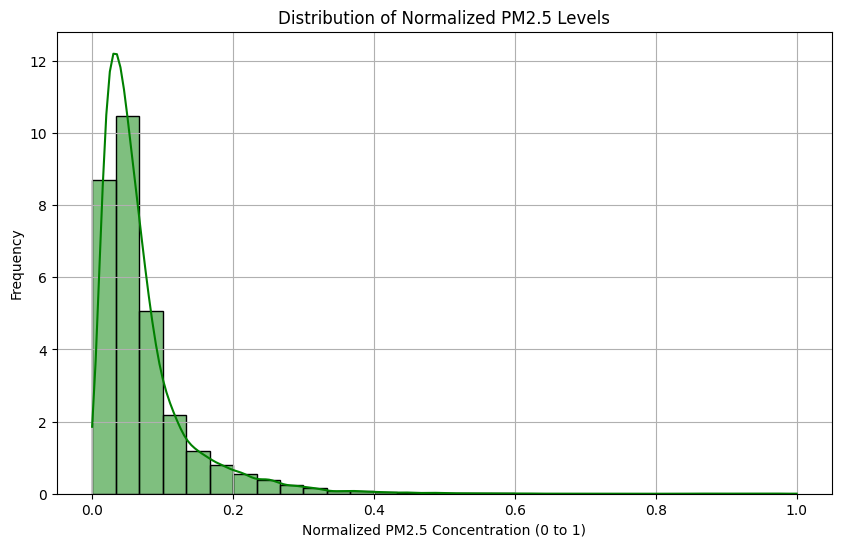

In [9]:
# unimodal right skewed histogram
scaler = MinMaxScaler()
df["PM2.5_Norm"] = scaler.fit_transform(df[["PM2.5"]])

plt.figure(figsize=(10, 6))
sns.histplot(df["PM2.5_Norm"], bins=30, kde=True, color="green", stat="density")

plt.xlabel("Normalized PM2.5 Concentration (0 to 1)")
plt.ylabel("Frequency")
plt.title("Distribution of Normalized PM2.5 Levels")
plt.grid(True)
plt.show()